In [1]:
# Importing required classes
from matplotlib import pyplot as plt
import numpy as np

# Importing main.py
from main import Main

# Importing helper functions from main
from main import init_weight_array_modified
from main import epitope_distance

In [2]:
# Importing Python Files from src Directory
""" Python File Imports"""
from src.pngs import PNGS
from src.panel import Panel
from src.blosum import BLOSUM
from src.pmbec import PMBEC
from src.weights import Weights
from src.epitope_dist import get_epitope_distance
from src.ic50 import IC50

""" Relative Python Paths """
rel_panel_path = './files/seap2020/136_panel_with_4lts.fa'
rel_weight_path = './files/seap2020/vrc01_wts.4lts.txt'
rel_blosum_path = './files/seap2020/BLOSUM62.txt'
rel_pmbec_path = './files/seap2020/PMBEC.txt'
rel_ic50_path = './files/seap2020/vrc01_ic50.txt'

""" Instantiating Each Class """
panel = Panel(rel_panel_path)
blosum = BLOSUM(rel_blosum_path)
pmbec = PMBEC(rel_pmbec_path)
weights = Weights(rel_weight_path)
weight_array_modified = np.zeros(panel.get_seq_length())
ic50 = IC50(rel_ic50_path, (panel.get_number_of_seq() - 2))

# print('5 lowest sequences', ic50.get_lowest_ic50_sequences(5))

In [3]:
""" Fixing get_epitope_distance """
seq = "AA\n"
ref_seq = "AB\n"
matrix_dict = {}
matrix_dict['A', 'A'] = 0
matrix_dict['A', 'B'] = 1
matrix_dict['B', 'A'] = 1

weights = [1, 0.5]

print('Testing epitope distance', get_epitope_distance(seq, ref_seq, matrix_dict, weights, True))



Testing epitope distance 0.3333333333333333


In [4]:
# If I wanted to make modifications to any of the parameters for epitope_distance

# Editing the reference sequence
reference_sequence = panel.get_reference_sequence(ic50.get_lowest_ic50_sequences(6)) # This panel.get_reference_sequence() function has one parameter, a numpy array of all the of the sequence names you want to read

blosum_dict = Main.get_blosum_dict()
ic50_weights = Main.log_base_10(Main.get_ic50_weights()) # Get the ic50 weight array, and then log it by 10

In [5]:
# 2D matrix containing epitope distance and its respective IC50 concentration
data_2d = epitope_distance(reference_sequence, blosum_dict, ic50_weights)

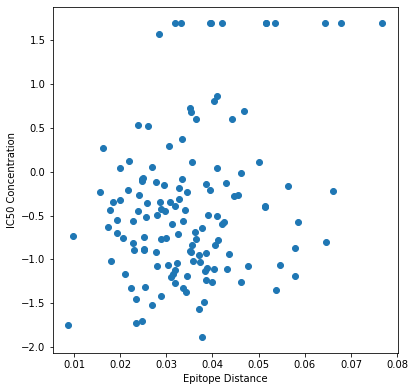

In [21]:
# Epitope Distances
x = data_2d[0]
# IC50 Concentrations
y = data_2d[1]

# Making the Scatter Plot
# plt.scatter(x, y)

# Making it a Square Plot
fig = plt.figure(figsize=(6,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.scatter(x,y)

# Adding Title
#plt.title("Epitope Distance vs IC50 Concentration")

# Adding Labels
plt.xlabel("Epitope Distance")
plt.ylabel("IC50 Concentration")

plt.show()

In [7]:
from scipy.stats import spearmanr

# Calculate Spearman's correlation
coef, p = spearmanr(x, y)
print("Spearman's correlation coefficient: %.3f" % coef) # Try to improve this value
print("P Value: %.3f" % p)

Spearman's correlation coefficient: 0.139
P Value: 0.107
